# 1. Basic Probability

In [9]:
using Plots
using Distributions
using SpecialFunctions
using LaTeXStrings
using Statistics
using Random
Random.seed!(1234)

pyplot;

1.1 Probability primer  
1.2 Common distributions  
1.3 Distributions continued  
1.4 Characteristic functions  
1.5 Summary and additional questions

## 1.1 Probability Primer

1.1.1 Rules of probability  
1.1.2 Discrete and continuous distributions  
1.1.3 Moments and cumulants   
1.1.4 Cumulative distributions  
1.1.5 Exponential distribution example

### 1.1.1 Rules of Probability

* **Fundamental convention**. For all non-overlapping events $\sum_{\{A\}}P(A)=1$  


* **Positivity**. Probabilities are positive and so $0\leq P(A) \leq 1$  


* **Union**.  $P(A\cup B)=P(A)+P(B)-P(A\cap B)$  


* **Mutual exclusivity**. $P(A \cap B)=0$ if $A$ and $B$ are disjoint.


* **Product rule and conditionality**.  $P(A \cap B)=P(A|B)P(B)$, provided that $P(B) \neq 0$.


* **Sum rule**. $P(A)=\sum_{\{B\}}P(A|B)P(B)$ over all non-overlapping events $\{B\}$   


* **Independence**.  $P(A|B)=P(A)$ so that $P(A\cap B)=P(A)P(B)$  


* **Bayes Rule**. $P(A|B)=\frac{P(B|A)P(A)}{P(B)}$   


#### 1.1.1.1  <font color='red'>Question:</font> A Simple Example   

A political party runs social-media campaigns in half of all the districts that they have a candidate up for election. 
 
Media: $A$ advert $\sim\!A$ no-ad    
Result: $B$ won or $\sim\!B$ lost     

|  $~$   | advert | no-ad |
| --- | :----  |:------ |
| **won**  | 4/10 |2/10 |
| **lost** | 1/10 | 3/10 |

* What are $P($advert$)$, $P($no-ad$)$, $P($won$)$ and $P($lost$)$ ?   

* What is $P($won$~ |~ $advert$)$ ?  

* What is $P($no-ad$~ | ~$lost$)$ ?  

* Did the advert have an effect?

#### 1.1.1.2 <font color='green'>Answer:</font> A Simple Example   


|  $~$   | advert | no-ad |
| --- | :----  |:------ |
| **won**  | 4/10 |2/10 |
| **lost** | 1/10 | 3/10 |


* $P($advert$)=5/10$, $P($no-ad$)=5/10$, $P($won$)=6/10$ and $P($lost$)=4/10$  


* $P($won$~ |~ $advert$)=4/5$ calculated from $P($won$~ \cap ~ $advert$)/P($advert$)$  


* What is $P($no-ad$~ | ~$lost$)=3/4$. Calculate this using $P($no-ad$~ \cap~ $lost$)/P($lost$)$


* Did the adverts have an effect? Yes $P($won$ ~\cap ~$advert$)\neq P($won$)P($advert$)$

### 1.1.2 Discrete and Continuous Distributions

Single-variable events can be labelled with a 
* **discrete** label $k$ for a countable number of states 
* **continuous** label $x$ for a density of states   

Discrete states have a probability $P(k)$ 
* With summation rule $1=\sum_{\{k\}}P(k)$
* Expectation of a function $\langle h(k)\rangle=\sum_{\{k\}}h(k)P(k)$

Continuous states have a probability density $f(x)$ where $f(x)dx$ is the probability that $X$ is between $x$ and $x+dx$.
* Integrate to unity $1=\int dx f(x)$ and units are $1/[x]$
* Expectation of a function $\langle h(x)\rangle=\int dx h(x)f(x)$


### 1.1.3 Moments and Cumulants    

* Common expectations are moments: $\langle x\rangle$, $\langle x^2\rangle$, $\langle x^3\rangle$, $\cdots$.  


* Moment generating function $M_x(t)=\langle e^{tx} \rangle=1+\frac{t\langle x \rangle }{2}+\frac{t^2\langle x^2 \rangle}{2!} + \cdots$.


* Cumulants generating function $K_x(t)=\log M_x(t)$


* $K_x(t)=\log \langle e^{tx} \rangle =\mu t + \frac{t^2\sigma^2}{2!} + \cdots$ where $\mu=\langle x \rangle$ is the mean and $\sigma^2=\langle x^2 \rangle$-$\langle x \rangle^2$ the variance.  


* Additivity of cumulants for sums of independent random variables. For $z=x+y$  

$\hspace{8mm}K_z(t)=\log \langle e^{t(x+y)} \rangle =\log \langle e^{tx} \rangle\langle e^{ty} \rangle=\log\langle e^{tx} \rangle + \log\langle e^{ty} \rangle=K_x(t)+K_y(t)$


* So $\mu_z=\mu_x+\mu_y$ and $\sigma^2_z=\sigma^2_x+\sigma^2_y$ etc.  


### 1.1.4 Cumulative Distributions

* The cumulative distribution $F(x)$ is defined as the probability that the variable is less than or equal to $x$ so that

$\hspace{0.8cm}$ $F(x)=P(X\leq x)$

* Maps both probabilities and densities onto the range $0$ and $1$

$\hspace{0.8cm}$ $F(x)=\int_{-\infty}^xf(x)dx$

* Useful for generating random numbers from any distribution using standard uniform randoms.

$\hspace{0.8cm}$ $F=g(X)$ $~$ can be inverted to give $~$ $X=g^{-1}(F)$

* Return to this later

#### 1.1.4.1 <font color='red'>Question:</font> An Exponential Distribution Example

Example: Exponentially distributed random numbers obey $f(x)=\theta(x)e^{-x/a}/a$ where $\theta(x)$ is the Heaviside function.   


* What is the mean?


* What is the variance?


* What is the cumulative distribution?


* Plot the density and cumulative distributions for $a=1.5$, one above the other, and label axes.


#### 1.1.4 <font color='green'>Answer:</font> An Exponential Distribution Example

By performing integration by parts, we hav

$$
\begin{align*}
\mathbb{E} [X] = & \int_{-\infty}^\infty \frac{x}{a} \theta (x)  e^{-\frac{x}{a}} dx \\ 
= & \int_0^\infty \frac{x}{a} e^{-\frac{x}{a}} dx \\ 
= & \int_0^\infty x e^{- \frac{x}{a}} d \frac{x}{a} \\ 
= & a \int_0^\infty \frac{x}{a} e^{-\frac{x}{a}} d \frac{x}{a} \\ 
= & a \int_0^\infty y e^{-y} dy \\ 
= & -a \int_0^\infty y de^{-y} \\ 
= & -a \left( y e^{-y} |_0^\infty - \int_0^\infty e^{-y} dy \right) \\ 
= & -a (-1) \\
= & a.
\end{align*}
$$

Similarly

$$
\mathbb{E}[X^2] =  \int_{-\infty}^\infty x^2 \theta(x) e^{-\frac{x}{a}} = 2a^2,
$$

so 

$$
\mathbb{Var}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2 = a^2.
$$

As for the cumulative distribution function,

$$
F(x) = \int^x_{-\infty} \theta(t) e^{-\frac{t}{a}} \frac{1}{a} dt =
\begin{cases}
0, \qquad & x \le 0 \\ 
1 - e^{-\frac{x}{a}}, & x > 0
\end{cases}.
$$

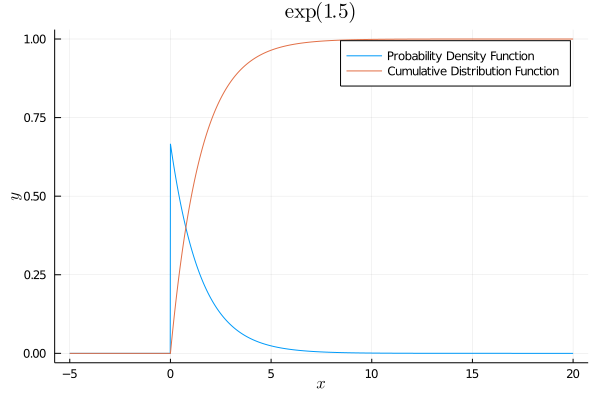

In [7]:
x = -5: 0.01: 20
a = 1.5


function exp_pdf(xs, a)
    pdf = zeros(length(xs))
    for i in 1: length(pdf)
        if xs[i] < 0
            pdf[i] = 0.0
        else
            pdf[i] = exp(-xs[i]./a) ./ a
        end
    end
    return pdf
end


function exp_cdf(xs, a)
    cdf = zeros(length(xs))
    for i in 1:length(cdf)
        if xs[i] < 0
            cdf[i] = 0
        else
            cdf[i] = 1 - exp(- xs[i] / a)
        end
    end
    return cdf
end


density = exp_pdf(x, a);
plot(x, density, label="Probability Density Function", xlabel=L"x", ylabel=L"y")
cdf = exp_cdf(x, a)
plot!(x, cdf, label="Cumulative Distribution Function", title=L"$\exp(1.5)$")

## 1.2 Common Distributions

1.2.1 Bernoulli distribution  
1.2.2 Binomial distribution  
1.2.3 Poisson distribution  
1.2.4 Normal distribution  
1.2.5 Gamma distribution

### 1.2.1 Bernoulli Distribution

* Discrete distribution where $x$ is a binary random number

$\hspace{0.9cm}$ $x=1$ with probability $p$  
$\hspace{0.9cm}$ $x=0$ with probability $q$


* Mean value is $\langle x \rangle=p$


* Variance. Use fact that $x^2=x$ so that $\langle x^2 \rangle=p$.  
Hence Var$(x)=\langle x^2 \rangle-\langle x \rangle^2=p(1-p)=pq$


* **<font color='red'>Question:</font>** Generate Bernoulli random numbers using the rand command and check this variance.

In [11]:
p = 0.6
random_nums = rand(10)
random_nums = random_nums .> 0.6
@show var(random_nums);
@show p*(1-p);

var(random_nums) = 0.2777777777777778
p * (1 - p) = 0.24


### 1.2.2 Binomial Distribution

* It's a sum of $n$ independent and identically distributed Bernoulli random variables $X=\sum_{j=1}^nx_j$



* Discrete distribution with $n+1$ states.



* Order unimportant so combinatorial factor is required.


* Interpret as prefactor of terms in the expansion of $(p+q)^n$ so need Pascal's Triangle

$\hspace{0.9cm}$  $P(X=k)={{n}\choose{k}}p^kq^{n-k}$

* Mean $\langle X \rangle=\sum_{j=1}^n\langle x_j \rangle=np$



* **<font color='red'>Question:</font>** What is the variance?

    $$
    \begin{align*}
    \text{Var}[x] = & \text{Var}[\sum_{j = 1}^n X_j] \\
    = & \sum_{j = 1}^n \text{Var}[X_j] \\
    = & \sum_{j = 1}^n p(1-p) \\
    = & np (1-p).
    \end{align*}
    $$

In [12]:
#  Binomial distribution examples
MyBinomial(n,k,p)=binomial.(n,k).*(p.^k).*((1-p).^(n.-k));

p1=0.1; n1=5;  k1=collect(0:n1); y1=MyBinomial(n1,k1,p1)
p2=0.5; n2=5;  k2=collect(0:n2); y2=MyBinomial(n2,k2,p2)
p3=0.5; n3=10; k3=collect(0:n3); y3=MyBinomial(n3,k3,p3);

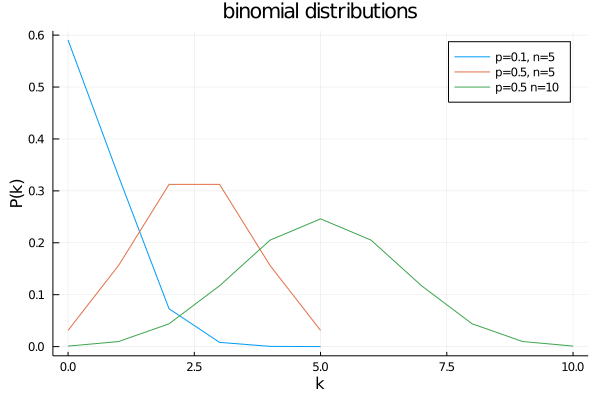

In [26]:
plot(k1, y1, label="p=$p1, n=$n1")
plot!(k2, y2, label="p=$p2, n=$n2")
plot!(k3, y3, label="p=$p3 n=$n3", title="binomial distributions", 
    xlabel="k", ylabel="P(k)")

### 1.2.3 Poisson Distribution

* Discrete distribution with a countable infinity of states $k=0,~1,~2,~\cdots$.   


* Determined by parameter $\lambda$ which is the typical number of times something happens.

$\hspace{0.8cm}$ $P(k)=e^{-\lambda}\frac{\lambda^k}{k!}$

* Mean number of events is $\lambda$


* Variance in number of events is also $\lambda$

In [27]:
# Poisson distribution examples
MyPoisson(lam,k)=exp(-lam)*(lam.^k)./gamma.(k.+1)

k=collect(0:20);
lam1=1;     y1=MyPoisson(lam1,k)
lam2=2.5;   y2=MyPoisson(lam2,k)
lam3=5;     y3=MyPoisson(lam3,k);

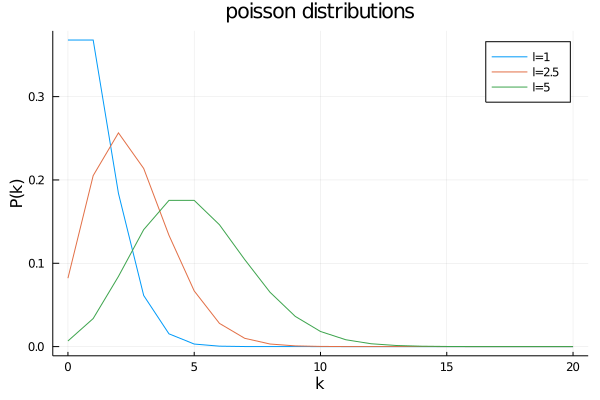

In [28]:
plot(k, y1, label="l=$lam1")
plot!(k, y2, label="l=$lam2")
plot!(k, y3, label="l=$lam3", title="poisson distributions", xlabel="k", ylabel="P(k)")

### 1.2.4 Normal Distribution

* Continuous distribution ubiquitous due to _Central Limit Theorem_: sums of random numbers tends to a Normal  

$\hspace{0.8cm}$ $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$

* Specified by the mean $\mu$ and variance $\sigma^2$.


* Standard normal: $\mu=0$ and $\sigma^2=1$


* Sum of Gaussian numbers is a Gaussian number (with summed mean and variances).   


In [29]:
# Normal distribution examples
MyNormal(x,mu,sig)=exp.(-(x.-mu).^2/(2*sig^2))/sqrt(2*pi*sig^2);

x=collect(-10:0.1:10);
mu1=0.0; s1=1.0;       y1=MyNormal(x,mu1,s1)
mu2=1.0; s2=2.0;       y2=MyNormal(x,mu2,s2)
mu3=3.0; s3=sqrt(5.0); y3=MyNormal(x,mu3,s3);

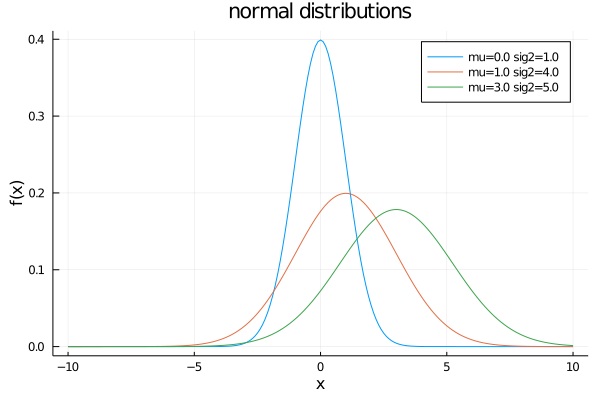

In [35]:
plot(x,y1,label="mu=$mu1 sig2=$(s1^2)")
plot!(x,y2,label="mu=$mu2 sig2=$(s2^2)")
plot!(x,y3,label="mu=$mu3 sig2=$(round(s3^2;digits=1))", title="normal distributions", xlabel="x",
    ylabel=("f(x)"))

### 1.2.6 Gamma Distribution

* Continuous distribution parameterised by $\alpha$ and $\beta$ with

$\hspace{0.7cm}$ $f(x)=\theta(x)\frac{1}{\Gamma(\alpha)}\beta^\alpha x^{\alpha-1}e^{-\beta x}$

* Parameters $\alpha$ and $\beta$ is set the shape.
* Special case: Erlang distribution with $\alpha=k$ where $k=1,~2,~\cdots$ is a positive integer. 
* Special case: $\chi^2_k$ distribution with $\alpha=k/2$ where $k=1,~2,~\cdots$ is a positive integer and $\beta=1/2$.
$\chi^2_k(x)=\theta(x)\frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}$


* **<font color='red'>Question:</font>** What are mean and variance in terms of $\alpha$ and $\beta$?  
    HINT: use normalisation condition.
    $$
    \begin{align*}
    \mathbb{E}[X] = & \int_{-\infty}^\infty \theta(x) \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}x dx \\
    = & \int_0^\infty \frac{\beta^\alpha}{\Gamma(\alpha)} x^\alpha e^{-\beta x} dx \\
    = & - \frac{\beta^{\alpha-1}}{\Gamma(\alpha)} \int_0^\infty x^\alpha d e^{-\beta x} \\
    = & - \frac{\beta^{\alpha-1}}{\Gamma(\alpha)} \left( \left. x^\alpha e^{-\beta x} \right|_0^\infty - \alpha \int_0^\infty e^{-\beta x} x^{\alpha - 1} dx \right) \\
    = & - \frac{\beta^{\alpha-1}}{\Gamma(\alpha)} \left( - \alpha \int_0^\infty e^{-\beta x} x^{\alpha - 1} dx \right) \\
    = & \frac{\alpha}{\beta} \int_0^\infty \frac{\beta^\alpha}{\Gamma(\alpha)} e^{-\beta x} x^{\alpha-1} dx \\
    = & \frac{\alpha}{\beta}.
    \end{align*}
    $$
    and

In [37]:
# Gamma distributions
MyGamma(a,b,x)=(b^a)*x.^(a-1.0).*exp.(-b*x)/gamma(a);

x=collect(0.01:0.01:15.1);
a1=0.5; b1=1.0; y1=MyGamma(a1,b1,x)
a2=1.0; b2=1.0; y2=MyGamma(a2,b2,x)
a3=5.0; b3=1.0; y3=MyGamma(a3,b3,x);

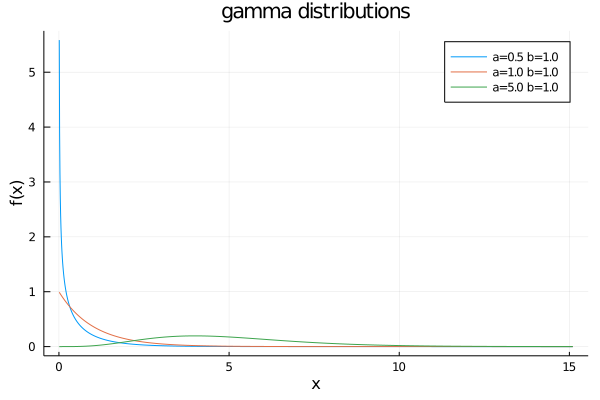

In [38]:
plot(x, y1, label="a=$a1 b=$b1")
plot!(x, y2, label="a=$a2 b=$b2")
plot!(x, y3, label="a=$a3 b=$b3", title="gamma distributions", xlabel="x", ylabel="f(x)") 

# 1.3 Distributions continued

1.3.1 Sums of random numbers   
1.3.2 Multidimensional distributions  
1.3.3 Marginal and conditional distributions    
1.3.4 Transformations of random variables    
 

## 1.3.1 Sums of random numbers

* Consider two independent random numbers $x$ and $y$ with distributions $f(x)$ and $g(y)$  


* Then $z=x+y$ has a distribution $h(z)$ that satisfies


$\hspace{0.8cm}$ $h(z)=\int dx \int dy \delta(z-x-y)f(x)g(y)$

$\hspace{0.8cm}$ $h(z)=\int dx f(x)g(z-x)$

* This is a convolution suggesting a multiplication in Fourier space.  


## 1.3.1 <font color='red'>Question:</font> Gamma sum rules


* Gamma distribution $\hspace{0.7cm}$ $g(x)=\frac{1}{\Gamma(\alpha)}\beta^\alpha x^{\alpha-1}e^{-\beta x}$ for $x>0$.


* Sum of two Gamma randoms with $(\alpha_1,\beta)$ and $(\alpha_2,\beta)$ is a Gamma random with $(\alpha_1+\alpha_2,\beta$)


* Use the rule $g(x)=\int dx_1 \int dx_2 \delta(x-x_1-x_2)g(x_1)g(x_2)$ to demonstrate this assertion.


* The Beta function will be of use   


$\hspace{0.8cm}$ $B(\alpha_1,\alpha_2)=\int_0^1du~ u^{\alpha_1-1}(1-u)^{\alpha_2-1}=\frac{\Gamma(\alpha_1)\Gamma(\alpha_2)}{\Gamma(\alpha_1+\alpha_2)}$ 

## 1.3.2 Multidimensional distributions

* Discrete case $P(X,Y)$ where $X$ and $Y$ have a countable number of states and the normalisation is

$\hspace{0.8cm}$ $1=\sum_{X}\sum_{Y}P(X,Y)$

* Continuous case $f(x,y)$ where the normalisation is by the double integral

$\hspace{0.8cm}$ $1=\int dx \int dy f(x,y)$

* Independence $f(x,y)=f(x)f(y)$  


* Expectations of joint variables

$\hspace{0.8cm}$ Covariance $\sigma_{xy}^2=\langle (x-\mu_x)(y-\mu_y)\rangle$ 

$\hspace{0.8cm}$ Correlation $\rho_{xy}=\frac{1}{\sigma_x\sigma_y}\sigma_{xy}^2$ which is dimensionless



## 1.3.3 Marginal and conditional distributions

* Marginal distribution of $X$ first $P(X)=\sum_{Y}P(X,Y)=\sum_{Y}P(X|Y)P(Y)$  


* Example:

| $~$ | $x_1$ | $x_2$ | $x_3$ | $P_y$  |
| ---- | --- | --- | --- | :----- |
| $y_1$ | 1/16 | 3/16 | 5/16 | 9/16  |
| $y_2$ | 2/16 | 3/16 | 2/16 | 7/16  |
| $P_x$ | 3/16 | 6/16 |7/16  |    |


* For the continuous case

$\hspace{0.8cm}$ $f(x)=\int dy f(x,y)=\int dy f(x|y)f(y)$

* Note the definition of the conditional density

$\hspace{0.8cm}$ $f(x|y)=f(x,y)/f(y)$



## 1.3.4 Transformations of random variables

* Consider a transformation from a continuously distributed random variable $Y$ to a new variable $X=g(Y)$. 


* Can use the marginal distribution definition where the conditional density is $f_{x|y}(x|y)=\delta(x-g(y))$.

$\hspace{0.8cm}$ $f_x(x)=\int dy f_{x|y}(x|y)f_y(y)=f_y(y)\frac{dy}{dg}$
 
 
* Factor $dg/dy$ from the Dirac delta (integral over $dy$ not $dx$). 
* Note the mass-preserving transformation is $f(x)dx=f(y)dy$. 
* But take care when mapping is not one-to-one, like $X=Y^2$.  


## 1.3.4 <font color='red'>Question:</font> Generating random variables

* We want to generate random variables $X$ with a distribution $f_x(x)$.
* We can easily generate random variables $Y$ uniformly in the range $0\to1$, so $f_y(y)=1$  


* What is the transformation $X=g(Y)$ required?
* What is the link to the cumulative distribution?
* Give the transformation required to generate exponentially distributed random numbers: $f(x)=\theta(x)e^{-x/a}/a$.
* Generate some exponentially distributed random numbers and compare with $f(x)$.  
 NB: plt\[:hist\](x,50,normed=1,color="lightgray") will plot a histogram of contents of vector x.

# 1.4 Characteristic functions 

1.4.1 Definition of the characteristic function  
1.4.2 Properties of the characteristic function  
1.4.3 Characteristic functions for common distributions  
1.4.4 Calculations using characteristic functions

## 1.4.1 Definition of the characteristic function

* Definition of the $m$th moment $\langle X^m \rangle$


* Moment generating function  

$\hspace{0.8cm}$ $M(t)=\langle e^{tX} \rangle=\sum_{m=0}^\infty\langle X^m \rangle\frac{t^m}{m!}$

* Characteristic function takes form  

$\hspace{0.8cm}$  $\phi_X(t)=\langle e^{itX} \rangle=\sum_{m=0}^\infty\langle X^m \rangle\frac{(it)^m}{m!}$

* Closely related to the moment generating function, but always exists.


* Basically a Fourier transform for the continuous case: $\phi_X(t)=\langle e^{itX}\rangle=\int dx f(x) e^{itx}$


## 1.4.2 Properties of the characteristic function

* Characteristic function $\phi_X(t)=\langle e^{itX} \rangle$

* Fundamental convention $\phi_X(0)=1$

* Sum of two independent random variables $X=X_1+X_2$

$\hspace{0.8cm}$  $\phi_X(t)=\langle e^{it(X_1+X_2} \rangle=\langle e^{itX_1}\rangle\langle e^{itX_2} \rangle=\phi_{X_1}(t)\phi_{X_2}(t)$

* Obvious generalisation to sums of multiple random variables 

* Useful for later. Consider a sample mean $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_k$ from $k$ independent samples.

$\hspace{0.8cm}$  $\phi_\overline{X}(t)=\langle e^{itX/n}\rangle^n=[\phi_X(t/n)]^n$



## 1.4.3 Characteristic functions of common distributions

* Example for a Bernouilli distribution with probability $p=1-q$  
$\phi_X(t)=pe^{it}+q$


* Summary for other distributions 

| Distribution | characteristic function $\phi(t)$ |
| --- | :---: |
|Bernoulli  | $1-p+pe^{it}$ |
| Binomial | $(1-p+pe^{it})^n$ |
| Poisson | $e^{\lambda(e^{it}-1)}$ |
| Normal | $e^{it\mu-\sigma^2t^2/2}$ |
| Gamma | $(1-it/\beta)^{-\alpha}$ |



## 1.4.4 Calculations using characteristic functions 

* Bernoulli has a characteristic function  $\phi_x(t)=1-p+pe^{it}$ 


* A binomial random number is a sum of independent Bernoulli randoms $X=\sum_{j=1}^nx_j$ 


* Characteristic functions of a sum of independent randoms is a product of their individual characteristic functions.  


* Hence $\phi_X(t)=\phi_x(t)^n=(1-p+pe^{it})^n$ as expected.





## 1.4.4 <font color='red'>Question:</font> Calculations using characteristic functions 

$\hspace{0.8cm}$ $X=X_1+X_2$ $~$ then   
$\hspace{0.8cm}$ $\phi_X(t)=\langle e^{it(X_1+X_2} \rangle=\langle e^{itX_1}\rangle\langle e^{itX_2} \rangle=\phi_{X_1}(t)\phi_{X_2}(t)$

* Use this product rule for characteristic functions to derive the summation rules for:  



1. Normally-distributed random numbers   
2. Gamma-distributed random numbers  


# 1.5 Summary and additional questions

## Day 1 Basic probability

1.1 Probability primer  
1.2 Common distributions  
1.3 Distributions continued  
1.4 Characteristic functions  
1.5 Summary and additional questions


---

## Additional questions

**Q1.5.1** Derivation of characteristic functions  
**Q1.5.2** Application to neuroscience   
**Q1.5.3** Gamma-distributed random-number generator  
**Q1.5.4** Using the Distributions.jl package  

## 1.5.1 <font color='red'>Question:</font> Derivation of characteristic functions

* In section 1.4.3 a list of characteristic functions was given for the distributions of section 1.2. 
Derive these from the Bernoulli, Binomial and Poisson distributions.



## 1.5.2 <font color='red'>Question:</font> Application to neuroscience   

Neuron $A$ makes $n$ synaptic contacts onto neuron $B$. When neuron $A$ fires, a vesicle containing neurotransmitter is released at each contact with probability $p$ (per contact). Each vesicle release contributes to a voltage increase in neuron $B$ that is normally distributed with mean $a$ and variance $\sigma^2$. The total increase in voltage is the sum of the effects from each contact plus some Gaussian-distributed background noise that has zero mean and a variance $s^2$. Hence the voltage change following one such event is 

$V=\phi(0,s^2)+\sum_{k=1}^n\delta_k\phi(a,\sigma^2)$ 

where $\delta_k$ is a Bernoulli random number with probability $p$ and $\phi(\mu,\sigma^2)$ is a Gaussian random number with mean $\mu$ and variance $\sigma^2$.
* Derive the distribution for $V$. HINT: it will be a finite sum of a product of known distributions.  
* Using values $n=10$, $p=0.3$, $a=0.2$, $\sigma=0.01$ and $s=0.05$ plot a histogram of random voltages drawn from this distribution and compare them to your theoretical distribution.   



## 1.5.3 <font color='red'>Question:</font> Gamma-distributed random-number generator.

* For exponentially-distributed random numbers it was possible to invert the cumulative distribution and use this to generate appropriately distributed randoms from uniformly distributed ones.
* In general it is not possible to analytically invert the cumulative distribution function.


* **Task**

* Develop a numerical method that generates gamma-distributed random numbers with shape factors $\alpha>1$ and $\beta$.

* Check that a histogram of random numbers agrees with the original distribution.



* How well does your code work for $0<\alpha\leq1$?
* How might it be adapted?

## 1.5.4 <font color='red'>Question:</font> Using the Distributions.jl package

* The [Distributions](https://juliastats.github.io/Distributions.jl/latest/starting.html) package provides a number of convenient functions for statistics.


* Install "Distribution.jl" in your version of Julia.  


* Browse the "getting started" documentation and use the package to generate some random numbers, plot the original distributions and their cumulative distributions. Here are some examples...


* Generates a named (here Normal) distribution. What are $\mu$ and $\sigma$?  
x1=-10.0:0.05:10.0;  
y1=pdf.(Normal(1.0,2.0),x1);


* Generates a named cumulative distribution (here gamma). What are $\alpha$ and $\beta$? What is $\theta$ in this context?    
x2=0.01:0.01:5  
y2=cdf.(Gamma(0.5,1.0),x2);  


* Generates random numbers from a named distribution (here gamma). What are $\alpha$ and $\beta$?  
z=rand(Gamma(0.5, 3.0), 100)


* You can compare these with your own cumulative distribution function of the previous question.